In [78]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns
from matplotlib import style
%matplotlib inline     
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import plotly
import plotly.express as px


In [17]:
df_train = pd.read_csv('clean_train_dataset.csv', index_col='id')
df_test = pd.read_csv('clean_test_dataset.csv', index_col='id')

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   longitude              59400 non-null  float64
 4   latitude               59400 non-null  float64
 5   wpt_name               59400 non-null  object 
 6   num_private            59400 non-null  int64  
 7   basin                  59400 non-null  object 
 8   region                 59400 non-null  object 
 9   region_code            59400 non-null  int64  
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  object 
 12  ward                   59400 non-null  object 
 13  population             59400 non-null  int64  
 14  recorded_by            59400 non-null  object 
 15

In [4]:
label_count=df_train.groupby(["status_group"])["status_group"].count()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


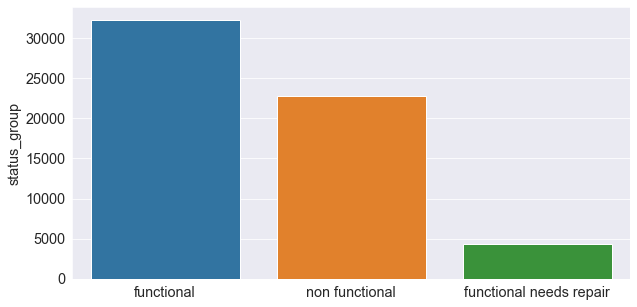

In [5]:
sns.set_style('darkgrid')
sns.barplot(df_train['status_group'].unique(),df_train['status_group'].value_counts())
plt.show()

In [6]:
df_quantity = df_train[['quantity']].join(pd.get_dummies(df_train['status_group'])).groupby(
    'quantity')[df_train['status_group'].unique()].apply(sum)

In [7]:
df_quantity

,functional,non functional,functional needs repair
quantity,,,
dry,157,6052,37
enough,21648,9138,2400
insufficient,7916,5763,1450
seasonal,2325,1309,416
unknown,213,562,14


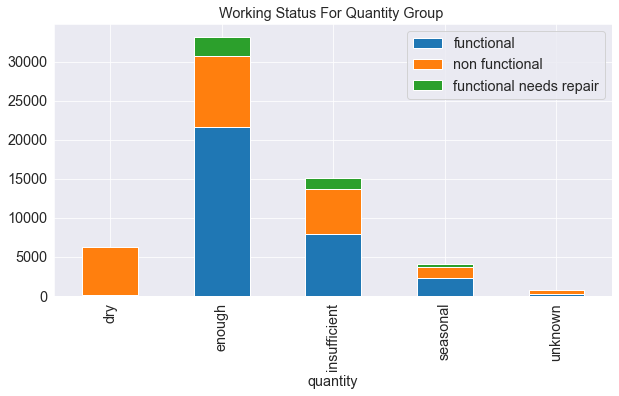

In [8]:
df_quantity.plot(kind="bar", stacked=True)
plt.title("Working Status For Quantity Group ")
plt.show()

In [9]:
water_quality_group = df_train[['water_quality_group']].join(pd.get_dummies(df_train['status_group'])).groupby(
    'water_quality_group')[df_train['status_group'].unique()].apply(sum)

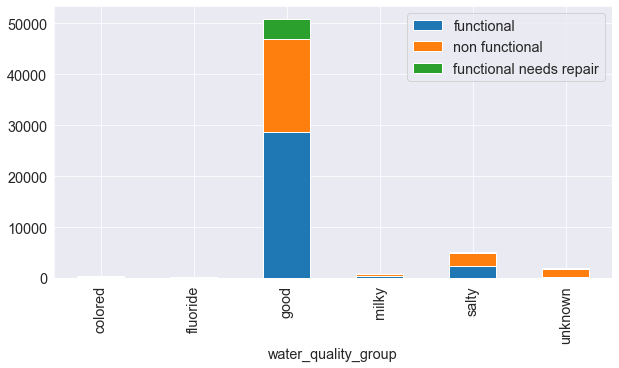

In [10]:
water_quality_group.plot(kind="bar", stacked=True)
plt.show()

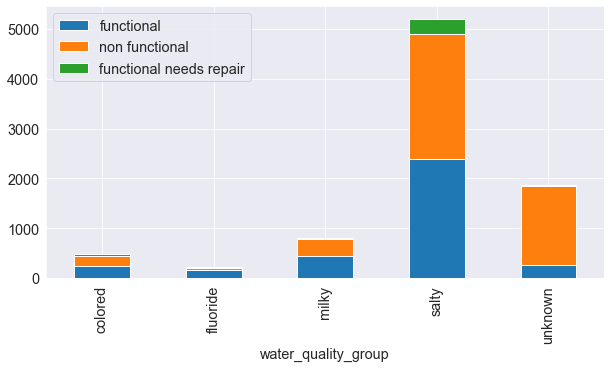

In [11]:
water_quality_group.loc[['colored','fluoride','milky','salty','unknown']].plot(kind="bar", stacked=True)
plt.show()

In [21]:
df_train['construction_year'] = df_train['construction_year'].astype(str)
df_year = df_train[['construction_year']].join(pd.get_dummies(df_train['status_group'])).groupby(
    'construction_year')[df_train['status_group'].unique()].apply(sum)

In [26]:
df_year

,functional,non functional,functional needs repair
construction_year,,,
1960s,156,340,42
1970s,1406,2652,348
1980s,2220,2935,423
1990s,4139,3021,518
2000s,9989,4364,977
2010s,3794,1147,220
unknown,10555,8365,1789


In [107]:
# df_basin = df_train[['basin']].join(pd.get_dummies(df_train['status_group'])).groupby(
#     'basin')[df_train['status_group'].unique()].apply(sum)
# df_basin.plot(kind="bar", stacked=True,color = ['green', 'red', '#44a5c2'],edgecolor = "black",alpha = 0.6,linewidth = 2)
# plt.ylabel('Frequency')
# plt.show()
fig=px.bar(df_year,orientation='h',color_discrete_sequence=plotly.colors.qualitative.Prism,)
fig.update_layout(title = "Frequency chart for Decades",
     xaxis_title = 'Counts', yaxis_title = 'Decades')
fig.show()

In [129]:
colors = plotly.colors.qualitative.Prism
fig=px.bar(df_basin,orientation='h',color_discrete_sequence=colors,)
fig.update_layout(title = "Frequency chart for basin",
     xaxis_title = 'Counts', yaxis_title = 'Basin')
fig.show()


In [150]:
df_pay = df_train[['payment']].join(pd.get_dummies(df_train['status_group'])).groupby(['payment'])[df_train['status_group'].unique()].apply(sum)

In [152]:
fig=px.bar(df_pay,orientation='h',color_discrete_sequence=colors,)
fig.update_layout(title = "Frequency chart for basin",
     xaxis_title = 'Counts', yaxis_title = 'Payment')
fig.show()


In [121]:
df_train.where(df_train.population==0).dropna().head()

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,payment,payment_type,water_quality_group,quantity,source,source_type,source_class,waterpoint_type_group,status_group,amount_tsh_percapita
id,,,,,,,,,,,,,,,,,,,,,
19728,0.0,2011-07-13,0.0,31.130847,-1.825359,Shuleni,0.0,Lake Victoria,Kagera,18.0,...,never pay,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional,0.0
19816,0.0,2012-10-01,0.0,33.362410,-3.766365,Kwa Ngomho,0.0,Internal,Shinyanga,17.0,...,never pay,never pay,good,enough,machine dbh,borehole,groundwater,hand pump,non functional,0.0
54551,0.0,2012-10-09,0.0,32.620617,-4.226198,Tushirikiane,0.0,Lake Tanganyika,Shinyanga,17.0,...,unknown,unknown,milky,enough,shallow well,shallow well,groundwater,hand pump,non functional,0.0
53934,0.0,2012-11-03,0.0,32.711100,-5.146712,Kwa Ramadhan Musa,0.0,Lake Tanganyika,Tabora,14.0,...,never pay,never pay,salty,seasonal,machine dbh,borehole,groundwater,hand pump,non functional,0.0
46144,0.0,2011-08-03,0.0,30.626991,-1.257051,Kwapeto,0.0,Lake Victoria,Kagera,18.0,...,never pay,never pay,good,enough,shallow well,shallow well,groundwater,hand pump,functional,0.0


In [122]:
df_train['amount_tsh_percapita'] = list(map(lambda x,y: x/(y+1), df_train['amount_tsh'], df_train['population']))


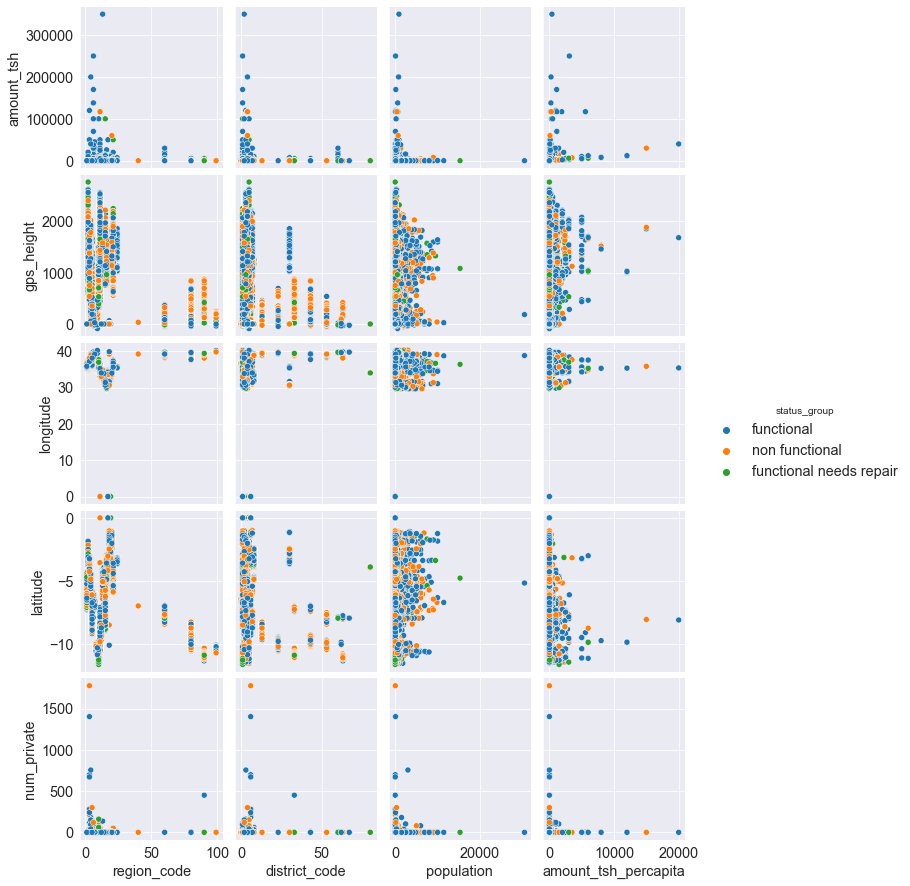

In [149]:
df_train=df_train.reset_index()
sns.pairplot(data=df_train.drop(labels=['id'], axis=1), hue='status_group', 
             x_vars=df_train.select_dtypes(exclude=object).columns[6:12], 
             y_vars=df_train.select_dtypes(exclude=object).columns[1:6])

(0.0, 40.0)

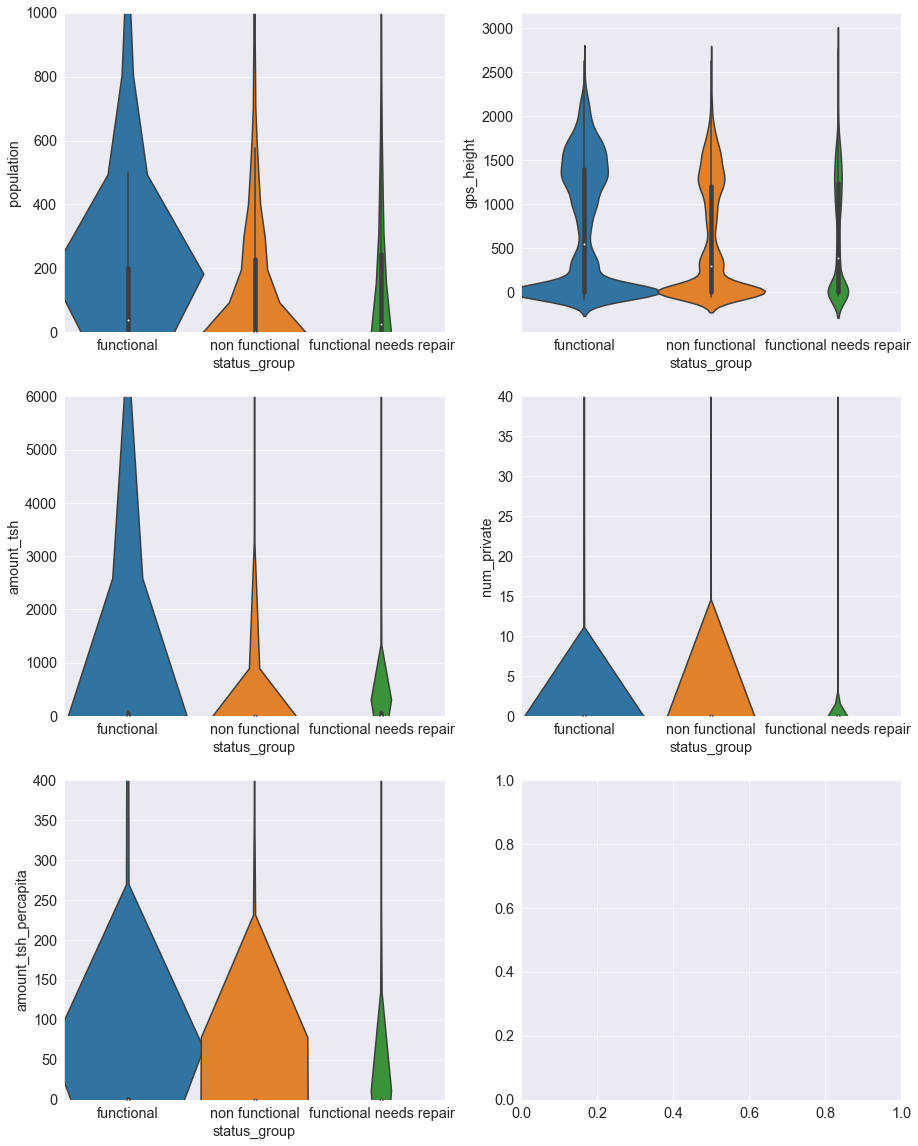

In [147]:
fig, ax = plt.subplots(nrows=3, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(20)
sns.violinplot(x = 'status_group', y='population', data=df_train, ax=ax[0,0], scale='count', width=1.2)
sns.violinplot(x = 'status_group', y='amount_tsh', data=df_train,  ax=ax[1,0], scale='count', width=1.2)
sns.violinplot(x = 'status_group', y='amount_tsh_percapita', data=df_train, ax=ax[2,0], scale='count', width=1.2)
sns.violinplot(x = 'status_group', y='gps_height', data=df_train, ax=ax[0,1], scale='count', width=1.2)
sns.violinplot(x = 'status_group', y='num_private', data=df_train, ax=ax[1,1], scale='count', width=1.2)
ax[0,0].set_ylim(0, 1000)
ax[1,0].set_ylim(0, 6000)
ax[2,0].set_ylim(0, 400)
ax[1,1].set_ylim(0, 40)